In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.models import Sequential

ModuleNotFoundError: No module named 'keras'

In [2]:
import glob, os, random
base_path ='C:/Users/chathurya/Desktop/dl/Garbage classification'

In [3]:
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))
print(len(img_list))

2396


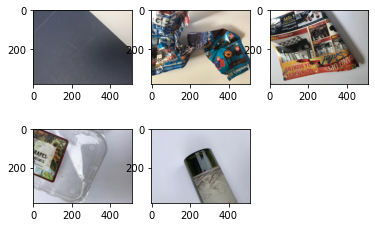

In [4]:
for i, img_path in enumerate(random.sample(img_list, 5)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

 

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

 

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),

    class_mode='categorical',
    subset='training',
    seed=0
)

 

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),

    class_mode='categorical',
    subset='validation',
    seed=0
)

 

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

 

print(labels)

Found 2158 images belonging to 5 classes.
Found 238 images belonging to 5 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic'}


In [8]:

model=sequential[
Dense(12,input=8,int='uniform',activation='relu')
Dense(8,int='uniform',activation='relu') 
Dense(1,int='uniform',activation='sigmoid')]
          

SyntaxError: invalid syntax (<ipython-input-8-8a8c0026db66>, line 3)

In [2]:
model.summary()

NameError: name 'model' is not defined

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [9]:
history=model.fit_generator(train_generator, epochs=50, validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
68/68 [==============================] - 208s 3s/step - loss: 1.4804 - acc: 0.3545 - val_loss: 1.3099 - val_acc: 0.4748
Epoch 2/50
68/68 [==============================] - 372s 5s/step - loss: 1.2627 - acc: 0.4722 - val_loss: 1.3921 - val_acc: 0.4034
Epoch 3/50
68/68 [==============================] - 327s 5s/step - loss: 1.2149 - acc: 0.4866 - val_loss: 1.1513 - val_acc: 0.5294
Epoch 4/50
68/68 [==============================] - 235s 3s/step - loss: 1.1881 - acc: 0.5111 - val_loss: 1.2095 - val_acc: 0.5168
Epoch 5/50
68/68 [==============================] - 234s 3s/step - loss: 1.0611 - acc: 0.5686 - val_loss: 1.0961 - val_acc: 0.5714
Epoch 6/50
68/68 [==============================] - 235s 3s/step - loss: 1.0116 - acc: 0.5959 - val_loss: 1.0302 - val_acc: 0.5294
Epoch 7/50
68/68 [==============================] - 234s 3s/step - loss: 0.9219 - acc: 0.6548 - val_loss: 0.9922 - val_acc: 0.6261
Epoch 8

In [12]:
from keras.models import load_model

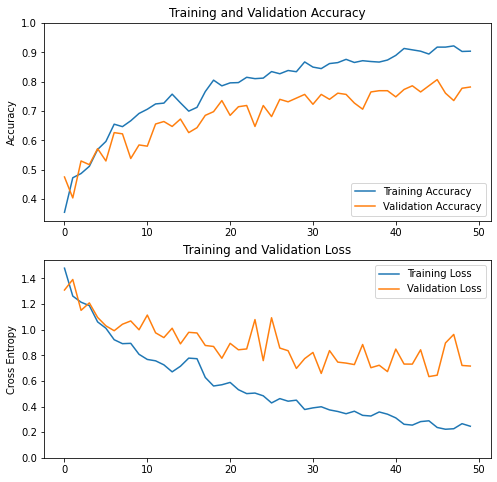

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Graph 1

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

#Graph 2 

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [16]:
model.save('modelfinal.h5')


In [17]:
from keras.preprocessing import image


Maximum Probability:  0.999897
Classified: cardboard


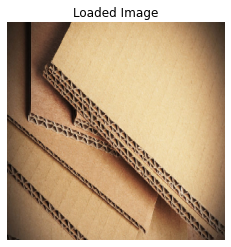

In [26]:
img_path = 'C:/Users/chathurya/Desktop/dl/test/card.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

Maximum Probability:  0.9999671
Classified: cardboard


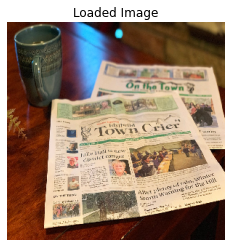

In [27]:
img_path = 'C:/Users/chathurya/Desktop/dl/test/newspaper.jpeg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

Maximum Probability:  0.93957937
Classified: paper


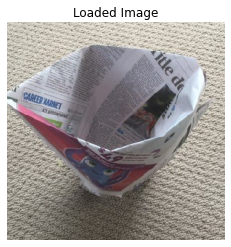

In [28]:
img_path = 'C:/Users/chathurya/Desktop/dl/test/cup.jpeg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

Maximum Probability:  0.98368627
Classified: paper


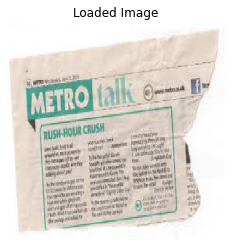

In [33]:
img_path = 'C:/Users/chathurya/Desktop/dl/test/paprtest.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

Maximum Probability:  0.94468963
Classified: metal


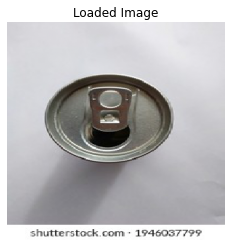

In [34]:
img_path = 'C:/Users/chathurya/Desktop/dl/test/can.jpg'

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)


-------------------Individual Probability--------------------------------

CARDBOARD : 5.37 %
GLASS : 0.04 %
METAL : 94.47 %
PAPER : 0.05 %
PLASTIC : 0.08 %


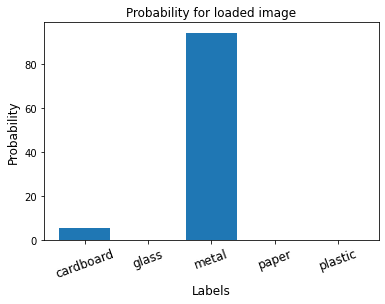

In [35]:
classes=[]
prob=[]
print("\n-------------------Individual Probability--------------------------------\n")

for i,j in enumerate (p[0],0):
    print(labels[i].upper(),':',round(j*100,2),'%')
    classes.append(labels[i])
    prob.append(round(j*100,2))
    
def plot_bar_x():
    index = np.arange(len(classes))
    plt.bar(index, prob)
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.xticks(index, classes, fontsize=12, rotation=20)
    plt.title('Probability for loaded image')
    plt.show()
plot_bar_x()